In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [85]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
df=pd.read_csv(boston_url)


In [86]:
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


Text(0.5, 1.0, 'boxplot of Median value of owner-occupied homes')

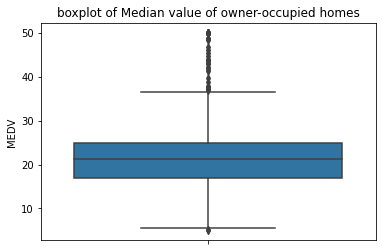

In [87]:
sns.boxplot(data=df , y='MEDV')
plt.title("boxplot of Median value of owner-occupied homes")

Text(0.5, 1.0, ' bar plot for the Charles river variable')

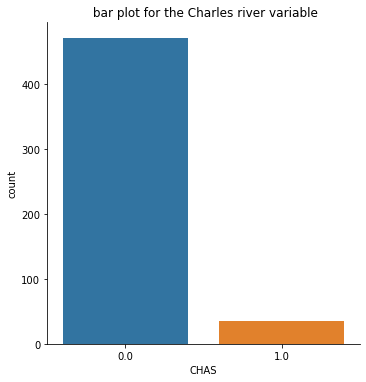

In [91]:
sns.catplot(kind="count" , x="CHAS" , data=df)
plt.title(" bar plot for the Charles river variable")

In [89]:
df["Age_cat"]=pd.cut(df["AGE"] ,  bins=[0 , 35 , 70 , 1000  ] , labels=['younger-35' , "35-70" , "70-older"])

Text(0.5, 1.0, ' boxplot for the MEDV variable vs the AGE variable')

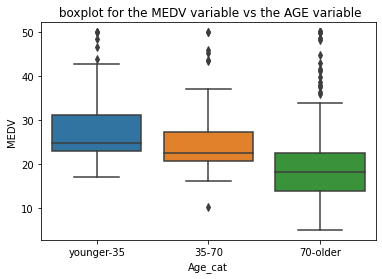

In [90]:
sns.boxplot(data=df , x='Age_cat' , y='MEDV')
plt.title(" boxplot for the MEDV variable vs the AGE variable")

Text(0.5, 1.0, 'relationship between NNOX and INDUS')

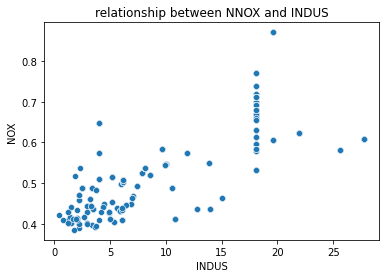

In [93]:
sns.scatterplot(data=df , x='INDUS' , y='NOX')
plt.title("relationship between NNOX and INDUS")
#there is an upward trend 

Text(0.5, 1.0, 'the histogram of the pupil to teacher ratio variable')

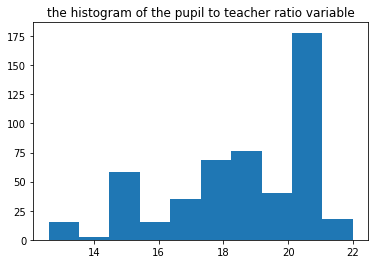

In [44]:
plt.hist(x="PTRATIO" , data=df )
plt.title("the histogram of the pupil to teacher ratio variable")

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [58]:
df1=df[df['CHAS']==0].MEDV
df2=df[df['CHAS']==1].MEDV

In [63]:
t_statistic, p_value = stats.ttest_ind(df1, df2)

In [75]:
print(f"F-Statistic:{t_statistic}")
print(f"P-Value:{p_value}")
if p_value < 0.05:
    print("if p-value is less than 0.05 there is a significant difference in median value of houses bounded by the Charles river")
if p_value > 0.05:

    print("if p-value is more than 0.05 there is no significant difference in median value of houses bounded by the Charles river")


F-Statistic:-3.996437466090509
P-Value:1.7105011022702984e-15
if p-value is less than 0.05 there is a significant difference in median value of houses bounded by the Charles river


Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [76]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
g1=df.loc[df["AGE"]<35].MEDV
g2=df.loc[(df["AGE"]>35) & (df["AGE"]<70)].MEDV
g3=df.loc[df["AGE"]>70].MEDV
F_Statistic , p_value=stats.f_oneway(g1 , g2 , g3)


In [77]:
print(f"F-Statistic:{F_Statistic}")
print(f"P-Value:{p_value}")

if p_value < 0.05:
    print("Reject null hypothesis: Means are significantly different.")
else:
    print("Fail to reject null hypothesis: Means are not significantly different.")

F-Statistic:36.40764999196599
P-Value:1.7105011022702984e-15
Reject null hypothesis: Means are significantly different.


Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)


In [78]:
x=df["INDUS"]
y=df["NOX"]
correlation_coefficient, p_value = stats.pearsonr(x, y)
print(f"F-Statistic:{correlation_coefficient}")
print(f"P-Value:{p_value}")

if p_value < 0.05:
    print("Reject null hypothesis: Means are significantly different.")
else:
    print("Fail to reject null hypothesis: Means are not significantly different.")

F-Statistic:0.763651446920915
P-Value:7.913361061239593e-98
Reject null hypothesis: Means are significantly different.


What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)


In [81]:
X = df['DIS']

y = df['MEDV']

X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 14 Aug 2023   Prob (F-statistic):           1.21e-08
Time:                        18:04:16   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
#There is an additional impact of 1.0916 distance to the five Boston employment centres on the median value of owner occupied homes.